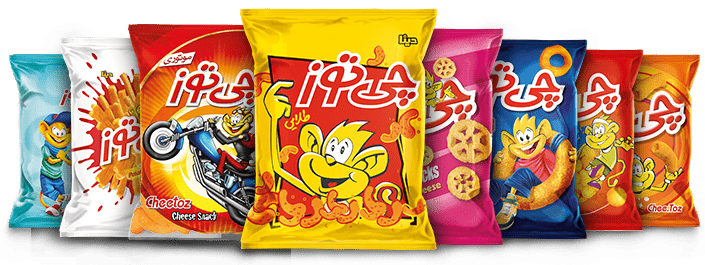

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <h3 align="left"><font color="navy">🛍️ Iranian Snack Detection & Analytics using YOLOv11 📦</font></h3>
    <p style="color:navy;">
        This project focuses on detecting and analyzing popular Iranian supermarket snacks and chips 🧃 using advanced object detection and segmentation models like YOLOv11 🧠. It leverages a custom dataset annotated with 19 well-known product classes from brands such as Cheetoz, Maz Maz, Ashi Mashi, and more.
        <br><br>
        Beyond detection, the system intelligently annotates video frames with insightful metrics like total price, nearest expiry date, and total calories — extracted from a structured product DataFrame 📊. This allows for a powerful demonstration of real-time analytics in retail environments.
        <br><br>
        Whether you're interested in smart retail systems, food inventory monitoring, or edge AI deployments, this notebook offers an applied glimpse into the synergy between computer vision and product metadata 📦🔍.
    </p>
</div>


<a id="c_table"></a> 

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=navy>Table of Contents:</font></h3>
<font color=navy>
        
* [1 | Libraries & Setup ⚙️](#lib)  
* [2 | Exploring the Dataset 🗄️](#data)  
* [3 | Preprocessing 🎓](#preprocessing)  
* [4 | YOLOv11 🧠](#yolo_model)  
* [5 | Model Evaluation & Metrics 📈](#metrics)  
* [6 | Predictions on Images 🖼️](#pred_images)  
* [7 | Predictions on Video 🎥](#pred_video)   
* [8 | Final Thoughts & Takeaways 📝](#summary)  

<a id="lib"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">1 - Libraries & Setup ⚙️</p>

⬆️ [Table of Contents](#c_table)

In [1]:
# Install Ultralytics and jalali dtaetime library
!pip install --q ultralytics --upgrade
!pip install --q jdatetime --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.9 MB/s eta 0:00:00


In [2]:
# === Core Python Libraries ===
import os                           # For file and directory operations
import warnings                    # To control warning messages
from datetime import datetime      # To handle date and time in Gregorian calendar

# === Data Handling & Analysis ===
import pandas as pd                # For handling tabular data
import numpy as np                 # For numerical operations
import jdatetime                   # For working with Jalali (Persian) dates

# === Visualization Libraries ===
import matplotlib.pyplot as plt    # For creating plots and charts
import seaborn as sns              # For enhanced statistical visualizations

# === Display Utilities (for Jupyter) ===
from IPython.display import display, Video              # To display video in notebooks
from IPython.display import Image as PImage             # To display images

# === Image Processing & Drawing ===
import cv2                          # OpenCV for image/video processing
from PIL import Image, ImageDraw, ImageFont  # For image drawing and font rendering

# === YOLOv11 (Ultralytics) ===
from ultralytics import YOLO        # Import YOLO model framework

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


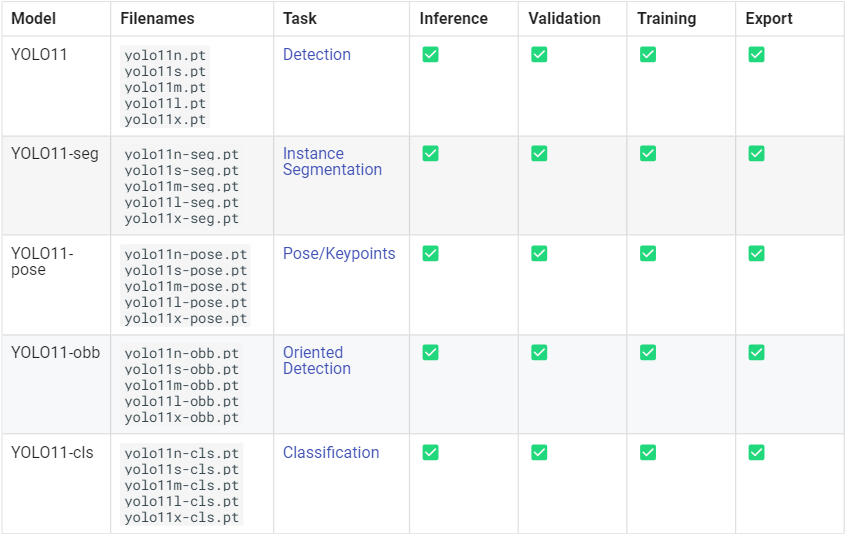

In [ ]:
model = YOLO('../models/yolo11m-seg.pt')  # Load the pre-trained YOLOv11 Medium model with segmentation capability

100%|██████████| 43.3M/43.3M [00:00<00:00, 109MB/s]


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        In this project, we selected <b>YOLO11</b> because it's one of the <b>newest and most advanced models</b> in the YOLO family, offering state-of-the-art performance for a variety of computer vision tasks 🏆.
    </p>
</div>


<a id="data"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">2 - Exploring the Dataset 🗄️</p>

⬆️ [Table of Contents](#c_table)

In [ ]:
df = pd.read_csv('../data/Products_info(1404-03-14).csv')
display(df)

Product_Name  Weight(gram)  Total_Calories(100g)  \
0                 Ashi Mashi snacks            60                 513.3   
1               Chee pellet ketchup            22                 471.0   
2               Chee pellet vinegar            22                 471.0   
3               Cheetoz chili chips            65                 536.7   
4             Cheetoz ketchup chips            65                 536.7   
5   Cheetoz onion and parsley chips            65                 536.7   
6               Cheetoz salty chips            65                 536.7   
7                 Cheetoz snack 30g            30                 483.3   
8                 Cheetoz snack 90g            90                 483.3   
9             Cheetoz vinegar chips            65                 536.7   
10               Cheetoz wheelsnack            35                 483.3   
11            Maz Maz ketchup chips            21                 559.7   
12            Maz Maz potato sticks            43                 559.7   
13              Maz Maz salty chips            21                 559.7   
14            Maz Maz vinegar chips            21                 559.7   
15                        Mini Lina            24                 500.0   
16              Minoo cream biscuit           192                 488.0   
17               Naderi mini cookie           110                 436.2   
18                Naderi mini wafer            90                 492.0   

   Prod_Date(jalali) Exp_Date(jalali)  Prod_Cost(Rial)  Price(Rial)  
0         1403-12-02       1404-05-31           155255       200000  
1         1404-01-27       1404-06-27            77630       100000  
2         1404-01-27       1404-06-27            77630       100000  
3         1403-10-27       1404-04-27           194100       250000  
4         1404-01-18       1404-07-18           232900       300000  
5         1404-01-22       1404-07-22           232900       300000  
6         1403-12-02       1404-06-02           194100       250000  
7         1404-02-19       1404-08-19            77630       100000  
8         1404-02-08       1404-08-08           194100       250000  
9         1404-02-06       1404-08-06           232900       300000  
10        1404-02-10       1404-08-10            93150       120000  
11        1404-01-31       1404-07-30            77600       100000  
12        1403-12-16       1404-06-16           155300       200000  
13        1404-01-18       1404-07-18            77600       100000  
14        1404-01-31       1404-07-30            77600       100000  
15        1404-01-10       1404-08-10            77630       100000  
16        1403-12-27       1404-12-27           209595       270000  
17        1404-01-27       1404-05-27           131960       170000  
18        1404-02-11       1404-11-11           116440       150000

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        This dataset provides valuable product information including expiration dates, prices, and calorie content. By leveraging this data, we can extract useful insights such as the number of days remaining until expiry for each product and the total calories contained in a single pack based on its weight. These details can enhance our project by enabling better product management, inventory optimization, and nutritional analysis in retail and supermarket environments.
    </p>
</div>

In [6]:
print('\n Dataset summary : \n')

pd.concat([
            pd.DataFrame(df.count()).T.rename(index={0: 'count'}),
           pd.DataFrame(df.nunique()).T.rename(index={0: 'number of unique'}),
           pd.DataFrame(df.dtypes).T.rename(index={0: 'dtype'}),
           pd.DataFrame(df.isna().sum()).T.rename(index={0: 'null count'}),
           df.describe().drop('count')
          ]).T


 Dataset summary : 



count number of unique    dtype null count  \
Product_Name            19               19   object          0   
Weight(gram)            19               11    int64          0   
Total_Calories(100g)    19                9  float64          0   
Prod_Date(jalali)       19               14   object          0   
Exp_Date(jalali)        19               15   object          0   
Prod_Cost(Rial)         19               10    int64          0   
Price(Rial)             19                8    int64          0   

                               mean           std       min       25%  \
Product_Name                    NaN           NaN       NaN       NaN   
Weight(gram)              58.210526     42.393106      21.0      23.0   
Total_Calories(100g)     512.826316     37.147631     436.2     483.3   
Prod_Date(jalali)               NaN           NaN       NaN       NaN   
Exp_Date(jalali)                NaN           NaN       NaN       NaN   
Prod_Cost(Rial)       141369.473684  62361.972318   77600.0   77630.0   
Price(Rial)           182105.263158     80317.353  100000.0  100000.0   

                           50%       75%       max  
Product_Name               NaN       NaN       NaN  
Weight(gram)              60.0      65.0     192.0  
Total_Calories(100g)     513.3     536.7     559.7  
Prod_Date(jalali)          NaN       NaN       NaN  
Exp_Date(jalali)           NaN       NaN       NaN  
Prod_Cost(Rial)       131960.0  194100.0  232900.0  
Price(Rial)           170000.0  250000.0  300000.0

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        The dataset summary reveals several important insights:<br><br>
        - All 19 products have complete data with no missing values, ensuring data quality.<br>
        - The product names are all unique, confirming a diverse range of 19 distinct snack and chip items.<br>
        - Weight varies significantly across products, ranging from 21g to 192g, with an average weight around 58 grams.<br>
        - Calorie content per 100g also varies, from about 436 to 560 calories, reflecting differences in product composition.<br>
        - Production and expiration dates show good variability, which allows for analysis of product shelf life.<br>
        - Production cost and price have a wide range, with prices varying from 100,000 to 300,000 Rial, indicating varied market positioning.<br><br>
        These insights provide a solid foundation for further analysis like price optimization, expiry management, and nutritional assessment in the project.
    </p>
</div>

<a id="preprocessing"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">3 - Preprocessing🎓</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        The dataset uses Jalali (Persian) dates for production and expiration. To work with Python's datetime library, we first convert these Jalali dates to Gregorian dates. After conversion, we subtract today's date from the expiration date to calculate how many days remain until each product expires. This information visualized effectively using a bar plot to show the distribution of days left for the products.
    </p>
</div>


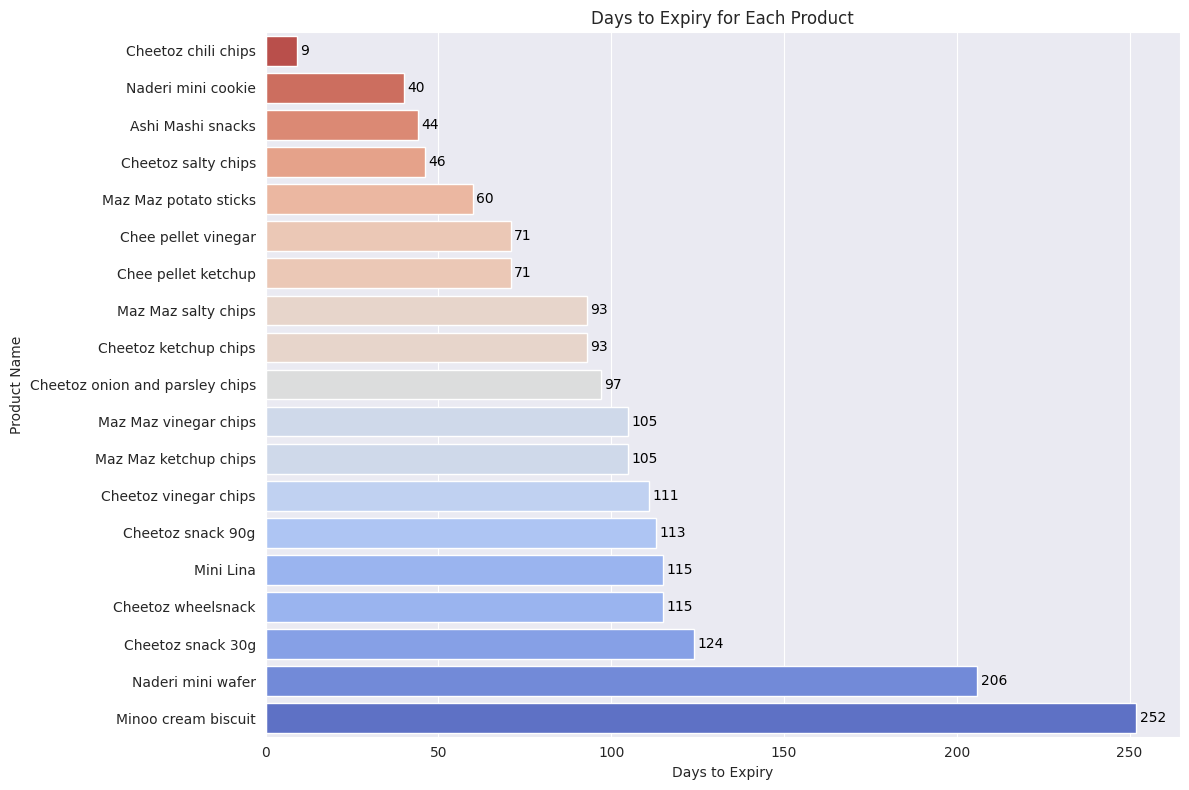

In [7]:
def jalali_to_gregorian(date_str):
    y, m, d = map(int, date_str.split('-'))
    return jdatetime.datetime(y, m, d).togregorian()

df['Prod_Date(gregorian)'] = df['Prod_Date(jalali)'].apply(jalali_to_gregorian)
df["Exp_Date(gregorian)"] = df["Exp_Date(jalali)"].apply(jalali_to_gregorian)

today = pd.to_datetime(datetime.today().date())

df["Days_to_Expiry"] = (df["Exp_Date(gregorian)"] - today).dt.days

# Sort by expiry
df_sorted = df.sort_values(by="Days_to_Expiry")

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df_sorted,
    x="Days_to_Expiry",
    y="Product_Name",
    hue="Days_to_Expiry",      # Adds gradient coloring
    palette="coolwarm_r",      # Reversed coolwarm palette
    dodge=False,
    #legend=False               # Hide redundant color legend
)
ax.legend_.remove()
# Add value labels to each bar
for i, (value, name) in enumerate(zip(df_sorted["Days_to_Expiry"], df_sorted["Product_Name"])):
    ax.text(
        value + 1,             # X-position
        i,                     # Y-position
        f"{value}",            # Text label
        va='center',           # Vertical alignment
        ha='left',             # Horizontal alignment
        fontsize=10,           # Size of font
        color='black'          # Color of font
    )

plt.title("Days to Expiry for Each Product")
plt.xlabel("Days to Expiry")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        By visualizing the data, we discovered that Cheetoz chili chips have less than 10 days remaining on their shelf life. Based on this insight, we can develop an application that automatically warns us about products nearing their expiration date, helping to reduce waste and manage inventory more efficiently.
    </p>
</div>


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        To determine the profit for each product, we calculated the difference between the selling price and the production cost using the formula <b>Profit = Price - Prod_Cost</b>. We then visualized these profits using a bar plot to easily compare the profitability of all products. This approach helps us identify the most profitable product in the dataset.
    </p>
</div>


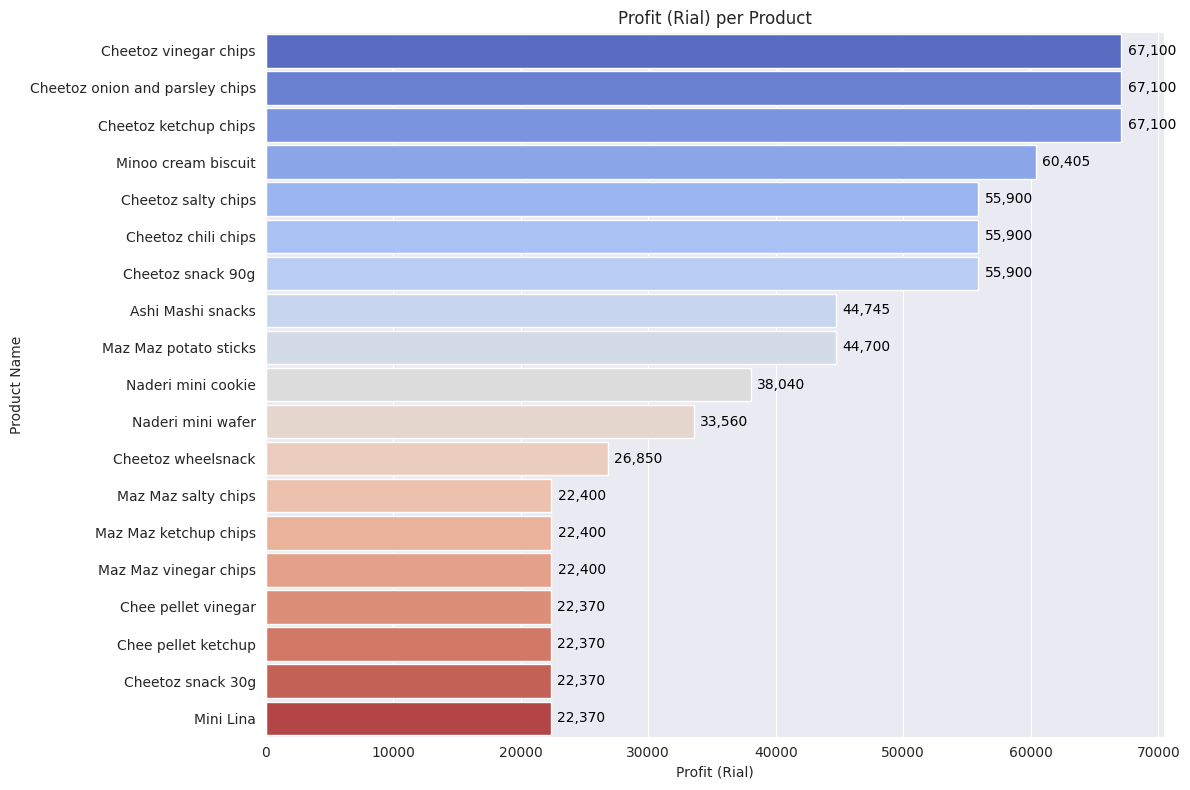

In [ ]:
df['Profit(Rial)'] = df['Price(Rial)'] - df['Prod_Cost(Rial)']
df_sorted = df.sort_values(by="Profit(Rial)", ascending=False)

plt.figure(figsize=(12, 8))

ax = sns.barplot(
    data=df_sorted,
    x="Profit(Rial)",
    y="Product_Name",
    palette="coolwarm",
    dodge=False,
    width=0.9  # ⬅️ Thicker bars
)
#ax.legend_.remove()
# Add profit value labels
for i, (profit, name) in enumerate(zip(df_sorted["Profit(Rial)"], df_sorted["Product_Name"])):
    ax.text(
        profit + 500,     # X-position
        i,                # Y-position
        f"{profit:,}",    # Comma-separated
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

plt.title("Profit (Rial) per Product")
plt.xlabel("Profit (Rial)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        It is important to note that this profit value is directly related to the product's price and does not account for the scale of investment or cost proportion. To obtain a more accurate assessment of profitability, we should divide the profit by the production cost or price to get relative profit margins. However, for simplicity, we will leave the analysis at this stage.
    </p>
</div>


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        To calculate the actual calorie content in each product pack, we used the formula <b>(Calories per 100g × Weight) / 100</b>. This gave us the total calories in a single pack. By visualizing this data, we can clearly see which products contain higher calorie levels, allowing us to build features that warn users—especially those concerned about their calorie intake—about how much energy they will consume per pack.
    </p>
</div>


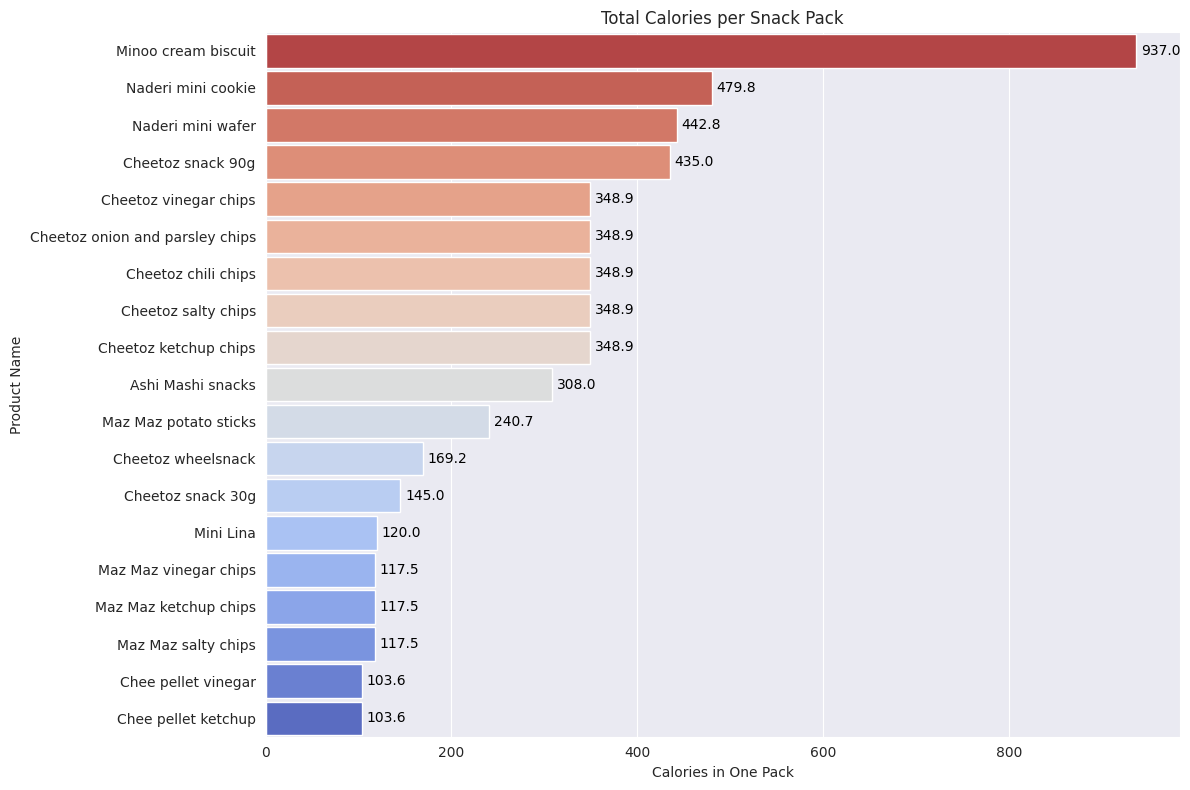

In [9]:
df['Calories_in_one_pack'] = (df['Total_Calories(100g)'] * df['Weight(gram)']) / 100.0

# Sort by calories
df_sorted = df.sort_values(by="Calories_in_one_pack", ascending=False)

plt.figure(figsize=(12, 8))

ax = sns.barplot(
    data=df_sorted,
    x="Calories_in_one_pack",
    y="Product_Name",
    palette="coolwarm_r",  # Still gives a gradient effect
    width=0.9             # Makes bars thick
)

# Add value labels
for i, (cal, name) in enumerate(zip(df_sorted["Calories_in_one_pack"], df_sorted["Product_Name"])):
    ax.text(cal + 5, i, f"{cal:.1f}", va='center', ha='left', fontsize=10, color='black')

plt.title("Total Calories per Snack Pack")
plt.xlabel("Calories in One Pack")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        In addition to the previous insights, we also calculated the price per gram of each product using <b>Price / Weight</b> and the shelf life duration in days by subtracting the production date from the expiration date. These features can provide deeper understanding of product value and longevity. However, we will not delve too much into these aspects at this stage.
    </p>
</div>


In [10]:
df['Price_per_Weight'] = (df['Price(Rial)'] / df['Weight(gram)']).round(2)
df['Duration_Days'] = (df['Exp_Date(gregorian)'] - df['Prod_Date(gregorian)']).dt.days

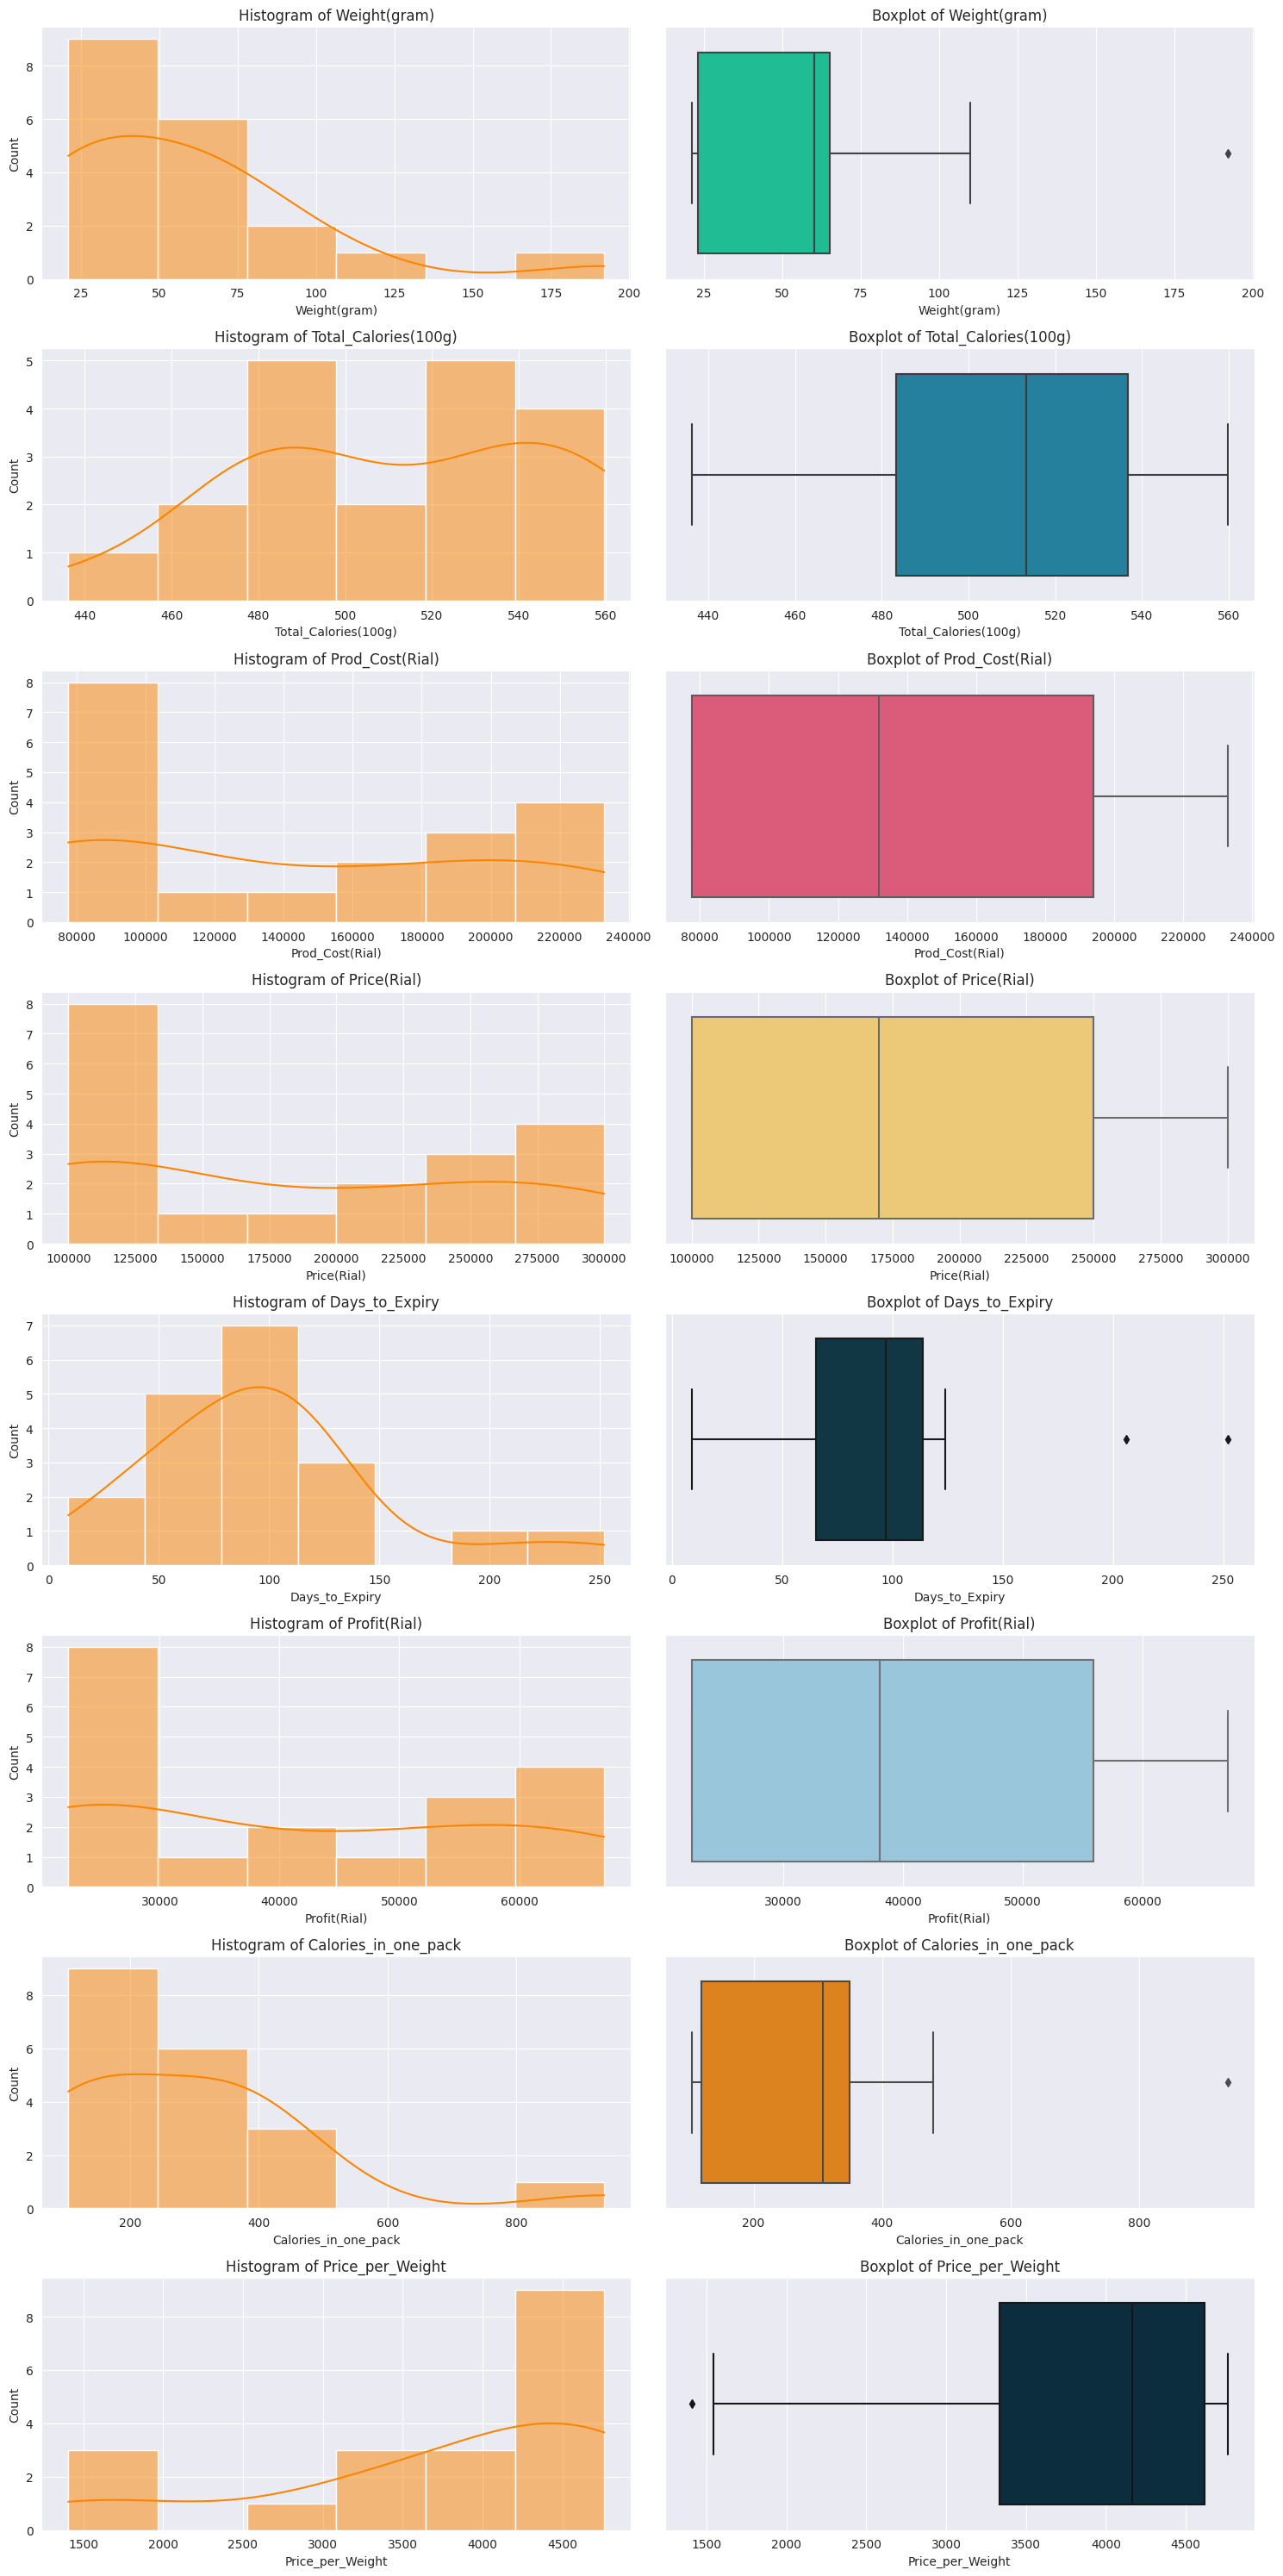

In [ ]:

# Define a custom palette for the visualizations
custom_palette = ['#06d6a0', '#118ab2', '#ef476f', '#ffd166', '#073b4c', '#8ecae6', '#fb8500', '#023047']

#df2 = df[df.columns != ['Product_Name', 'Prod_Date(jalali)', 'Exp_Date(jalali)', 'Prod_Date(gregorian)', 'Exp_Date(gregorian)']]
df2 = df.select_dtypes(include=['number'])

# Define a list of column names from the dataframe that we want to visualize
list_of_columns = list(df2.columns)
list_of_columns.pop()

# Create a subplot grid with 2 columns and a number of rows equal to the number of columns to visualize
fig, axs = plt.subplots(len(list_of_columns), 2, figsize=(15, 30))

# Loop through each column name, using 'enumerate' to get both the column name and the loop index
for i, column_name in enumerate(list_of_columns):
    # Plot a histogram for each column
    sns.histplot(data=df2, x=column_name, kde=True, ax=axs[i, 0], color = '#fb8500')
    
    # Set the title for each histogram to indicate what data it represents
    axs[i, 0].set_title(f'Histogram of {column_name}')
    
    # Plot a boxplot for each column to show the distribution of values
    sns.boxplot(data=df2, x=column_name, ax=axs[i, 1], palette=[custom_palette[i % len(custom_palette)]])
    
    # Set the title for each boxplot to indicate what data it represents
    axs[i, 1].set_title(f'Boxplot of {column_name}')

# Adjust the layout of the subplots to prevent any overlapping of elements
plt.tight_layout()

# Display the plots
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        By visualizing various numerical features using histograms and boxplots, we observed that most products tend to have relatively low weights and moderate prices. However, when examining the <b>Price_per_Weight</b> metric, we found that many of these lightweight products are priced high relative to their weight. This insight highlights how some snacks might appear affordable but actually have a high cost per gram, which is important for both pricing strategies and consumer awareness.
    </p>
</div>


<a id="yolo_model"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">4 - YOLOv11 🧠</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        The following code initiates the training of a YOLO model using the specified dataset and configuration file. It uses the <b>data.yaml</b> file located in the Iranian Snack and Chips Detection dataset to define the class names and image paths. The model is trained for 50 epochs with a batch size of 16 and an input image size of 640×640 pixels. The results, including weights and logs, are saved under the project name <b>store_model_train</b>. This process fine-tunes the model to accurately detect and segment Iranian snack products.
    </p>
</div>

In [ ]:
results = model.train(
    data='../data/Iranian Snack and Chips Detection (YOLO Format)/data.yaml',
    epochs=50,
    batch=16,
    imgsz=640,
    name='store_model_train'
)

Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/iranian-snack-and-chips-detection-yolo-format/Iranian Snack and Chips Detection (YOLO Format)/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=store_model_train, nbs=64, nms=False, opset=None

100%|██████████| 755k/755k [00:00<00:00, 31.0MB/s]


Overriding model.yaml nc=80 with nc=19

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 115MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 29.9±6.6 MB/s, size: 171.3 KB)


train: Scanning /kaggle/input/iranian-snack-and-chips-detection-yolo-format/Iranian Snack and Chips Detection (YOLO Format)/train/labels... 452 images, 3 backgrounds, 0 corrupt: 100%|██████████| 452/452 [00:02<00:00, 207.33it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/iranian-snack-and-chips-detection-yolo-format/Iranian Snack and Chips Detection (YOLO Format)/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 24.0±7.1 MB/s, size: 168.6 KB)


val: Scanning /kaggle/input/iranian-snack-and-chips-detection-yolo-format/Iranian Snack and Chips Detection (YOLO Format)/valid/labels... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<00:00, 158.85it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/iranian-snack-and-chips-detection-yolo-format/Iranian Snack and Chips Detection (YOLO Format)/valid is not writeable, cache not saved.


Plotting labels to runs/segment/store_model_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000435, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/store_model_train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.6G     0.4602      1.141      2.637     0.9518         25        640: 100%|██████████| 29/29 [00:30<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         91        304      0.759      0.737      0.843      0.823      0.759      0.737      0.843      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.8G     0.3314      0.459     0.8385     0.8543         33        640: 100%|██████████| 29/29 [00:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         91        304      0.792      0.902      0.952      0.905      0.792      0.902      0.952      0.914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.8G     0.3467     0.4432     0.6204     0.8525         33        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         91        304      0.947      0.916       0.98      0.917      0.938      0.908      0.966      0.901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.9G     0.3526     0.4497     0.5352     0.8575         31        640: 100%|██████████| 29/29 [00:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         91        304      0.899       0.93      0.982      0.929      0.899       0.93      0.982      0.915



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.8G      0.356     0.4461      0.489     0.8567         32        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         91        304      0.874      0.908      0.971      0.932      0.874      0.908      0.971      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.9G     0.3364     0.4268     0.4689     0.8576         27        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         91        304      0.902      0.964      0.983      0.941      0.899      0.961      0.978      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.2G     0.3243     0.4072     0.4225     0.8488         41        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         91        304      0.955      0.897      0.968      0.936      0.955      0.897      0.968      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.7G     0.3165     0.3981     0.3977     0.8413         22        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         91        304      0.961      0.985      0.988      0.965      0.961      0.985      0.988      0.951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.7G      0.301     0.4119     0.3949     0.8463         31        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         91        304      0.967      0.955      0.991      0.964      0.967      0.955      0.991      0.959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.8G     0.3009      0.391     0.3866     0.8504         27        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         91        304      0.937       0.97      0.987       0.96      0.937       0.97      0.987      0.952



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.6G      0.286     0.3686     0.3571     0.8413         30        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         91        304      0.977       0.99      0.991      0.964      0.977       0.99      0.991      0.959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.7G     0.2927      0.366     0.3555     0.8398         33        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         91        304      0.988      0.984       0.99      0.965      0.988      0.984       0.99       0.96



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.8G     0.2767     0.3623     0.3406     0.8364         42        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         91        304      0.956      0.967      0.992      0.972      0.956      0.967      0.992      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.9G     0.2816     0.3689     0.3333     0.8414         22        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         91        304      0.956      0.973      0.994       0.97      0.956      0.973      0.994      0.969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50        11G     0.2731      0.369     0.3115     0.8373         26        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         91        304      0.988      0.988      0.993      0.975      0.988      0.988      0.991      0.973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.7G     0.2657     0.3537     0.3117      0.834         35        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         91        304       0.97      0.946      0.994      0.972       0.97      0.946      0.994      0.965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.7G     0.2727     0.3524     0.3088     0.8374         29        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         91        304      0.935      0.955      0.989      0.966      0.935      0.955      0.989       0.96



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.9G     0.2658     0.3596     0.3154     0.8368         30        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         91        304      0.973      0.976      0.991      0.971      0.973      0.976      0.991       0.96



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.3G     0.2663     0.3609     0.3089     0.8352         39        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         91        304      0.985      0.985      0.995      0.979      0.985      0.985      0.995      0.966



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.7G     0.2543      0.359     0.2844     0.8361         35        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         91        304      0.976      0.995      0.991      0.974      0.976      0.995      0.991      0.968



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.7G     0.2479     0.3356     0.2723     0.8414         32        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         91        304      0.984      0.997      0.995      0.977      0.984      0.997      0.995      0.974



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.9G     0.2357     0.3413      0.264     0.8328         31        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         91        304      0.984      0.987      0.995      0.981      0.984      0.987      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.7G     0.2481     0.3301     0.2708     0.8328         33        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         91        304      0.986      0.982      0.994      0.982      0.986      0.982      0.994      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.8G     0.2519     0.3499     0.2721     0.8341         24        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         91        304      0.992      0.993      0.995      0.984      0.992      0.993      0.995      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.7G     0.2468     0.3274     0.2562     0.8373         24        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         91        304      0.987      0.993      0.993      0.981      0.987      0.993      0.993      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.9G     0.2417     0.3256     0.2509     0.8369         24        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         91        304      0.988       0.99      0.995      0.982      0.988       0.99      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50        11G      0.229     0.3067     0.2274     0.8259         13        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         91        304      0.991      0.993      0.994      0.986      0.991      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.8G     0.2303     0.3154     0.2309      0.832         24        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         91        304       0.99      0.985      0.994      0.985       0.99      0.985      0.994      0.979



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.7G     0.2267     0.3124     0.2311     0.8302         36        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         91        304      0.988      0.992      0.995      0.985      0.988      0.992      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.9G     0.2256     0.3214     0.2294     0.8315         37        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         91        304      0.989      0.994      0.994      0.984      0.993      0.997      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50        11G     0.2082     0.2967     0.2152     0.8247         32        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         91        304      0.988      0.997      0.995      0.983      0.988      0.997      0.995      0.977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.8G     0.2176     0.3113     0.2139     0.8295         32        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         91        304      0.993      0.993      0.995      0.982      0.993      0.993      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.7G     0.2105     0.3011     0.2064     0.8266         38        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         91        304      0.986      0.993      0.995      0.983      0.986      0.993      0.995      0.977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.8G     0.2155      0.311     0.2152     0.8272         32        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         91        304      0.989      0.993      0.995      0.986      0.989      0.993      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.6G     0.2063     0.2989     0.2117     0.8214         31        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         91        304      0.988      0.995      0.995      0.983      0.988      0.995      0.995      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.6G     0.2066     0.2896     0.2135     0.8255         22        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         91        304      0.992      0.997      0.995      0.986      0.992      0.997      0.995      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.8G     0.2064     0.3002      0.205     0.8253         29        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         91        304      0.991      0.996      0.995      0.986      0.991      0.996      0.995      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.8G      0.202       0.29     0.2002      0.827         30        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         91        304      0.989      0.997      0.995      0.986      0.989      0.997      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.8G     0.2024      0.293     0.1982     0.8242         45        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         91        304      0.992      0.997      0.995      0.987      0.992      0.997      0.995       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.9G     0.1924     0.2871     0.1819     0.8182         29        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         91        304      0.994      0.994      0.995      0.985      0.994      0.994      0.995      0.977


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.7G     0.1514      0.247     0.1489     0.7751         14        640: 100%|██████████| 29/29 [00:28<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         91        304      0.989      0.994      0.994      0.983      0.989      0.994      0.994      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.8G     0.1516     0.2451     0.1401     0.7887         13        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         91        304      0.988      0.991      0.994      0.984      0.987       0.99      0.991      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.7G      0.149     0.2334     0.1353     0.7891         11        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         91        304      0.995      0.994      0.993      0.988      0.995      0.994      0.993       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.7G     0.1498     0.2298     0.1368     0.7869         14        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         91        304      0.992      0.993      0.994      0.985      0.992      0.993      0.994      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.7G     0.1441     0.2277     0.1302     0.7829         17        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         91        304      0.995      0.993      0.993      0.983      0.995      0.993      0.993      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.9G     0.1421     0.2212     0.1265     0.7783         16        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         91        304      0.989      0.993      0.993      0.984      0.989      0.993      0.993      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50        11G     0.1351     0.2229     0.1219     0.7789         15        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         91        304       0.99      0.993      0.993      0.986       0.99      0.993      0.993      0.977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.7G     0.1295     0.2127     0.1205     0.7808          9        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         91        304      0.993      0.993      0.993       0.99      0.993      0.993      0.993       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.7G     0.1271     0.2148     0.1194     0.7787         12        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         91        304      0.995      0.993      0.993      0.989      0.995      0.993      0.993       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.9G     0.1268     0.2144     0.1147     0.7729         14        640: 100%|██████████| 29/29 [00:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         91        304      0.994      0.993      0.993      0.989      0.994      0.993      0.993      0.981



50 epochs completed in 0.428 hours.
Optimizer stripped from runs/segment/store_model_train/weights/last.pt, 45.2MB
Optimizer stripped from runs/segment/store_model_train/weights/best.pt, 45.2MB

Validating runs/segment/store_model_train/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m-seg summary (fused): 138 layers, 22,349,961 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         91        304      0.994      0.993      0.993      0.987      0.994      0.993      0.993      0.981
     Ashi Mashi snacks         10         10      0.996          1      0.995      0.989      0.996          1      0.995       0.97
   Chee pellet ketchup         21         23      0.997          1      0.995      0.993      0.997          1      0.995      0.986
   Chee pellet vinegar         19         20      0.995          1      0.995      0.992      0.995          1      0.995      0.991
   Cheetoz chili chips          5          5          1          1      0.995      0.995          1          1      0.995      0.995
 Cheetoz ketchup chips         18         18          1          1      0.995      0.995          1          1      0.995      0.995
Cheetoz onion and parsley chips         14         14          1          1      0.995      0.995          1          1      0.995      0.995
   Cheetoz salty chips          6          6          1     

<a id="metrics"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">5 - Model Evaluation & Metrics 📈</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        To begin evaluating the trained model and its performance, we first inspect the output directory using <b>os.listdir('runs/segment/store_model_train')</b>. This allows us to see all the files and artifacts generated during training, such as model weights, training logs, result images, and metrics. These outputs are essential for understanding how well the model has learned and for performing further analysis or testing.
    </p>
</div>


In [13]:
os.listdir('runs/segment/store_model_train')

['train_batch1160.jpg',
 'train_batch1.jpg',
 'val_batch0_labels.jpg',
 'confusion_matrix_normalized.png',
 'train_batch1162.jpg',
 'BoxR_curve.png',
 'BoxP_curve.png',
 'BoxPR_curve.png',
 'args.yaml',
 'BoxF1_curve.png',
 'train_batch1161.jpg',
 'MaskP_curve.png',
 'labels.jpg',
 'val_batch2_labels.jpg',
 'confusion_matrix.png',
 'MaskR_curve.png',
 'results.csv',
 'val_batch0_pred.jpg',
 'weights',
 'train_batch0.jpg',
 'results.png',
 'val_batch1_pred.jpg',
 'MaskF1_curve.png',
 'MaskPR_curve.png',
 'val_batch2_pred.jpg',
 'val_batch1_labels.jpg',
 'labels_correlogram.jpg',
 'train_batch2.jpg']

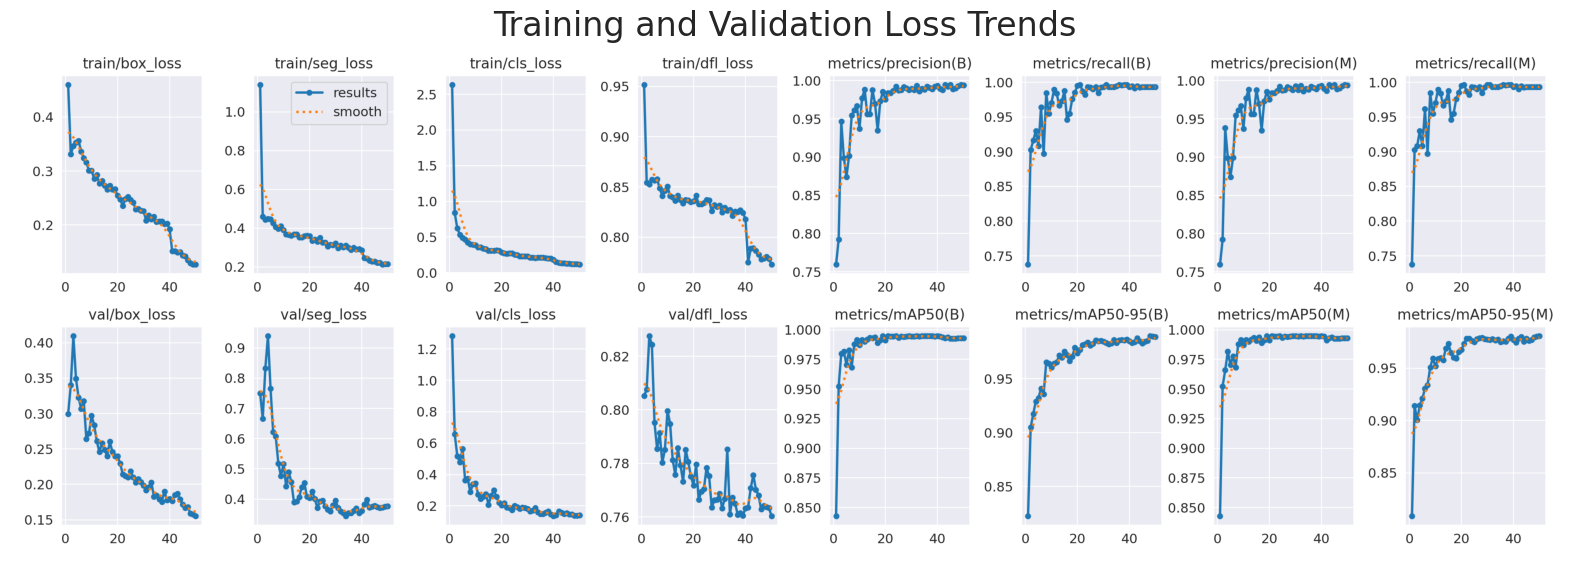

In [ ]:
# Create the full file path by joining the directory path with the filename
results_path = 'runs/segment/store_model_train/results.png'

# Read the image using cv2
image = cv2.imread(results_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Display the image using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(image)
plt.title('Training and Validation Loss Trends', fontsize=24)
plt.axis('off') 
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        We visualized the training results using the <b>results.png</b> file generated during training. The plot shows the trends of training and validation losses, along with metrics like precision and recall. From the plot, we observed that both the training and validation losses are steadily decreasing, indicating that the model is learning effectively. Additionally, precision and recall values are increasing and approaching saturation, hovering around 99%. This plateau suggests that the model has achieved high performance and further improvements are limited due to the already excellent accuracy.
    </p>
</div>


In [ ]:
results_df = pd.read_csv('runs/segment/store_model_train/results.csv')

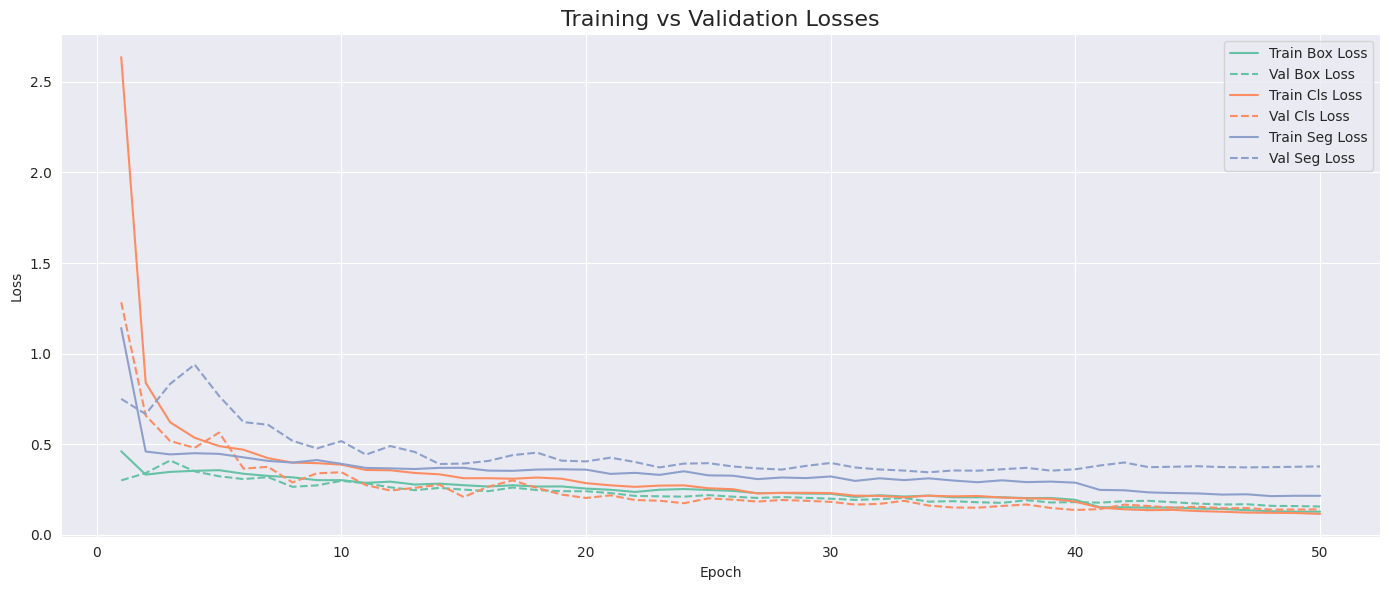

In [16]:
# Color palette
palette = sns.color_palette("Set2", 10)

# === 1. Loss Curves === #
plt.figure(figsize=(14, 6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss', color=palette[0])
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss', linestyle='--', color=palette[0])

plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Cls Loss', color=palette[1])
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Val Cls Loss', linestyle='--', color=palette[1])

plt.plot(results_df['epoch'], results_df['train/seg_loss'], label='Train Seg Loss', color=palette[2])
plt.plot(results_df['epoch'], results_df['val/seg_loss'], label='Val Seg Loss', linestyle='--', color=palette[2])

plt.title("Training vs Validation Losses", fontsize=16)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        By plotting training and validation losses for box, class, and segmentation losses across epochs, we can identify signs of overfitting or underfitting, and also:<br><br>
        - <strong>Model Convergence:</strong> Smooth and gradual decline in both training and validation losses indicates stable learning. Sudden drops or spikes may signal instability.<br>
        - <strong>Segmentation Performance:</strong> Segmentation loss trends help us understand how well the model is learning to draw accurate masks around objects, which is especially critical in instance segmentation tasks.<br>
        - <strong>Training Effectiveness:</strong> If the training losses decrease steadily while validation losses plateau or rise, it can signal that the model is memorizing training data instead of generalizing.<br>
        - <strong>Epoch Selection:</strong> By identifying the point where validation losses stop improving, we can select the optimal epoch for saving the best model (early stopping).<br>
        - <strong>Loss Component Balance:</strong> Comparing the relative scale and trend of box, class, and seg losses reveals if one component is dominating and possibly skewing the model’s focus.
        These insights help in making informed decisions for fine-tuning, adjusting hyperparameters, or modifying the training schedule.
    </p>
</div>


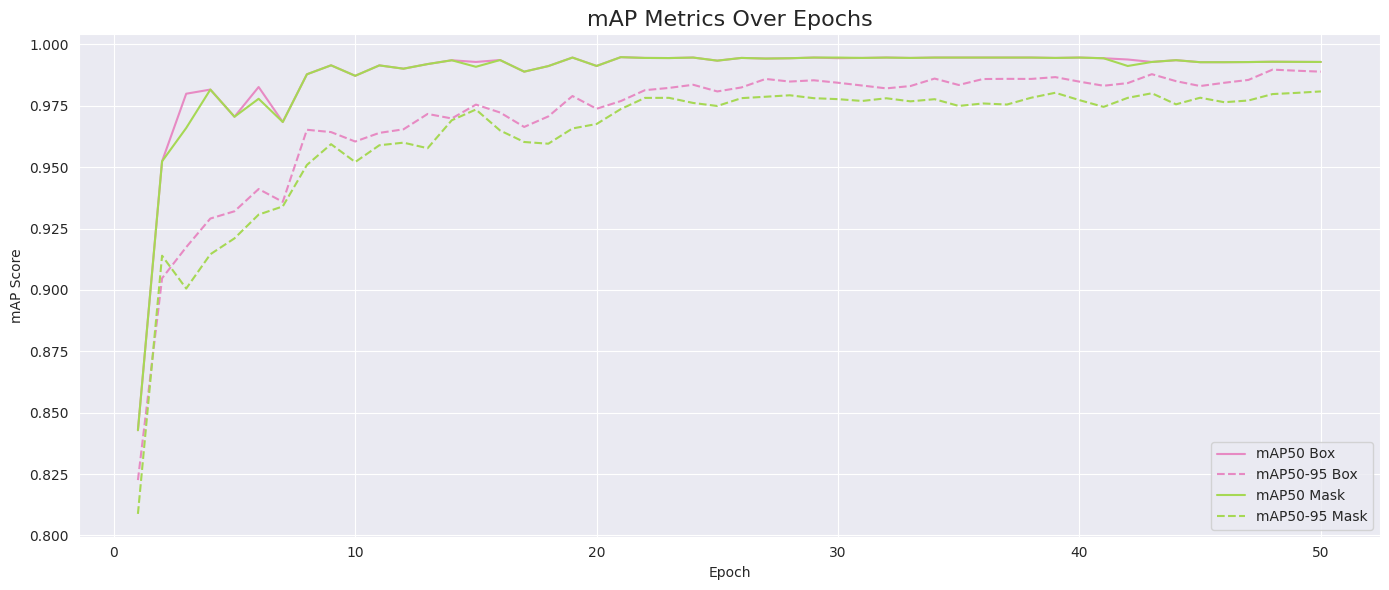

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50 Box', color=palette[3])
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95 Box', linestyle='--', color=palette[3])

plt.plot(results_df['epoch'], results_df['metrics/mAP50(M)'], label='mAP50 Mask', color=palette[4])
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(M)'], label='mAP50-95 Mask', linestyle='--', color=palette[4])

plt.title("mAP Metrics Over Epochs", fontsize=16)
plt.xlabel("Epoch")
plt.ylabel("mAP Score")
plt.legend()
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        By plotting the <b>mAP50</b> and <b>mAP50-95</b> metrics for both bounding boxes and masks across epochs, we observed that the accuracy of the model improves steadily over time. This indicates that the model is learning to detect and segment objects more precisely. The increase in both box and mask mAP values shows consistent progress in both object localization and segmentation quality. Additionally, the upward trend without significant drops suggests stable training with no signs of model collapse or severe overfitting. These metrics are key indicators of model performance in real-world object detection and segmentation tasks.
    </p>
</div>


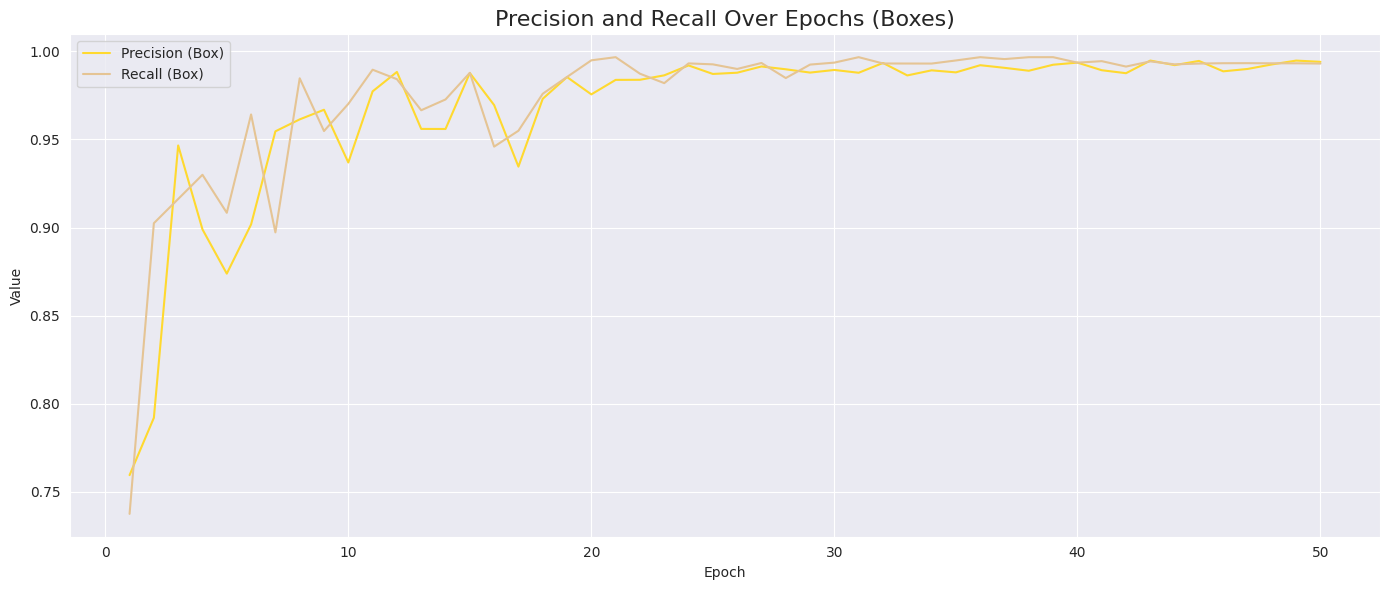

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision (Box)', color=palette[5])
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall (Box)', color=palette[6])

plt.title("Precision and Recall Over Epochs (Boxes)", fontsize=16)
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        We visualized the precision and recall metrics for bounding boxes over the training epochs. The upward trend in both curves indicates that the model is increasingly accurate in detecting objects (precision) and is successfully identifying a larger portion of the relevant objects (recall). This suggests that the model is not only making fewer false detections but also missing fewer objects. The balance and convergence of these metrics over time reflect healthy training behavior and strong model generalization.
    </p>
</div>


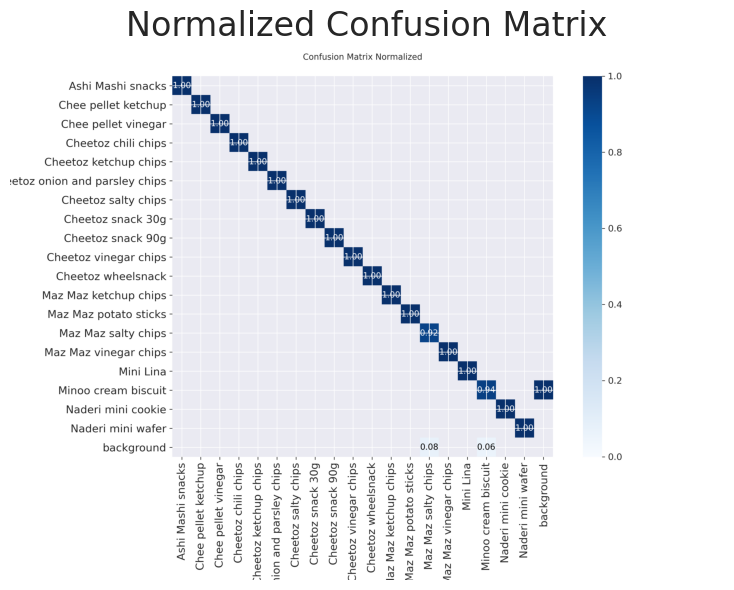

In [ ]:
confusion_matrix_normalized_path = 'runs/segment/store_model_train/confusion_matrix_normalized.png'

# Load and convert image
cm_norm_img = cv2.imread(confusion_matrix_normalized_path)
cm_norm_img = cv2.cvtColor(cm_norm_img, cv2.COLOR_BGR2RGB)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Show the image on the axis
ax.imshow(cm_norm_img)
ax.set_title('Normalized Confusion Matrix', fontsize=24)
ax.axis('off')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        By visualizing the <b>normalized confusion matrix</b>, we observed that nearly all of the product classes have no significant misclassification. Most of the predicted labels align closely with their true labels, which indicates the model is highly accurate in distinguishing between different snack and chips products. This strong class-wise performance highlights the effectiveness of the training process and the quality of the dataset annotations.
    </p>
</div>


<a id="pred_images"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">6 - Predictions on Images 🖼️</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        To perform predictions on test images, we will first load the best model weights. This ensures that we are using the most accurate version of the model trained on our dataset. We will then run predictions on the test set using the <b>predict</b> function, specifying the image directory and setting a confidence threshold of 0.8 to filter out low-confidence detections. The <b>save=True</b> and <b>save_txt=True</b> options allow us to store both the visual prediction results and the corresponding label files for further evaluation and deployment.
    </p>
</div>


In [20]:
trained_model = YOLO('runs/segment/store_model_train/weights/best.pt')

In [ ]:
results = trained_model.predict(
    source='../data/Iranian Snack and Chips Detection (YOLO Format)/test/images',
    save=True,       # Save results with bounding boxes
    save_txt=True,   # Save predicted labels to txt files
    conf=0.8        # Confidence threshold, adjust if needed
)


image 1/60 /kaggle/input/iranian-snack-and-chips-detection-yolo-format/Iranian Snack and Chips Detection (YOLO Format)/test/images/20250506_205726_mp4-0001_jpg.rf.bb3fce475c7a3c385cdd5bf002575140.jpg: 640x384 1 Cheetoz snack 90g, 52.1ms
image 2/60 /kaggle/input/iranian-snack-and-chips-detection-yolo-format/Iranian Snack and Chips Detection (YOLO Format)/test/images/20250506_205726_mp4-0045_jpg.rf.b31ba4ca69954c3a1ea2c2df1092e409.jpg: 640x384 1 Ashi Mashi snacks, 1 Cheetoz snack 30g, 1 Cheetoz snack 90g, 1 Maz Maz ketchup chips, 17.0ms
image 3/60 /kaggle/input/iranian-snack-and-chips-detection-yolo-format/Iranian Snack and Chips Detection (YOLO Format)/test/images/20250506_205726_mp4-0084_jpg.rf.8a86c10106bd983b8f46b330a0f11f6b.jpg: 640x384 1 Chee pellet vinegar, 1 Cheetoz onion and parsley chips, 2 Mini Linas, 1 Naderi mini wafer, 17.0ms
image 4/60 /kaggle/input/iranian-snack-and-chips-detection-yolo-format/Iranian Snack and Chips Detection (YOLO Format)/test/images/20250506_205726_mp

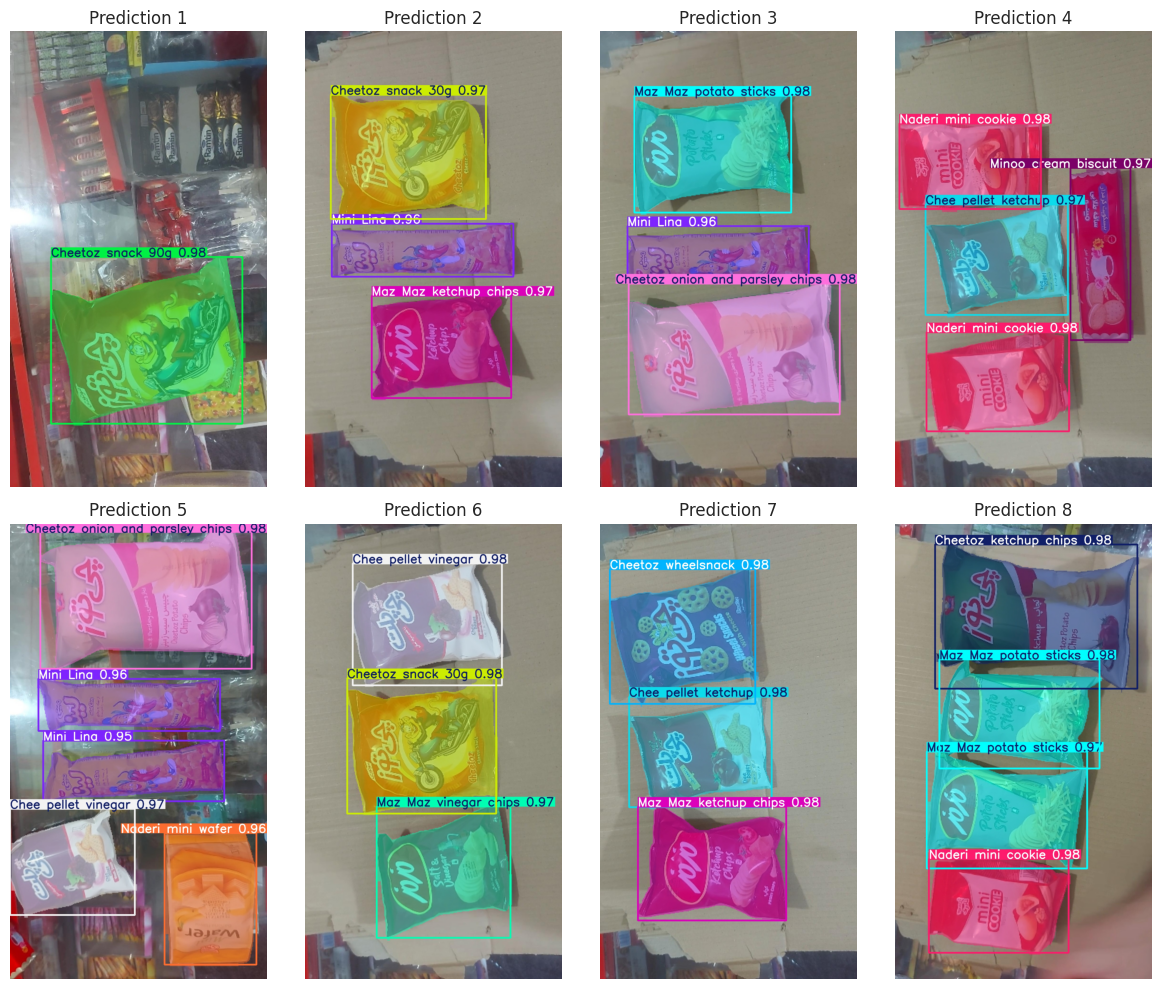

In [22]:
# Directory with predicted images
result_dir = 'runs/segment/predict'
image_files = [os.path.join(result_dir, f) for f in os.listdir(result_dir) if f.endswith('.jpg')]

# Limit to 4 images for a 2x2 grid
image_files = image_files[:8]

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(12, 10))
axs = axs.flatten()

# Plot each image
for i, img_path in enumerate(image_files):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].set_title(f'Prediction {i+1}')
    axs[i].axis('off')

# Hide any unused subplots
for j in range(len(image_files), 8):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        To visualize the model's predictions, we displayed the first 8 predicted test images using a <b>2×4</b> subplot layout. Each subplot shows an image along with its predicted segmentation results. From this visualization, we observed that all the predictions are accurate — the model correctly identified and segmented the products in each image. This confirms that our YOLOv11 segmentation model performs well in real-world supermarket scenarios.
    </p>
</div>


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        To enrich our predictions with useful information, we will annotate each predicted image with:<br>
        - The <strong>total price</strong> of all detected products<br>
        - The <strong>nearest expiry date</strong> (in days)<br>
        - The <strong>total calories</strong> in the detected items<br><br>
        This is done by matching predicted class labels to entries in the product information DataFrame. Using the corresponding data, we draw this information directly on the image with a styled overlay. These annotated visuals make it easier to understand the contents and value of each frame at a glance, offering a powerful way to combine visual detection with data insights.
    </p>
</div>


In [23]:
df_info = df.copy()
df_info['Product_Name'] = df_info['Product_Name'].str.lower()
df_info.set_index('Product_Name', inplace=True)

In [24]:
import os
from PIL import Image, ImageDraw, ImageFont

label_dir = 'runs/segment/predict/labels'
image_dir = 'runs/segment/predict'
output_dir = 'runs/segment/annotated_with_price'
os.makedirs(output_dir, exist_ok=True)

# Replace this with your actual class names in correct order
class_names = [
    'ashi mashi snacks', 'chee pellet ketchup', 'chee pellet vinegar',
    'cheetoz chili chips', 'cheetoz ketchup chips', 'cheetoz onion and parsley chips',
    'cheetoz salty chips', 'cheetoz snack 30g', 'cheetoz snack 90g',
    'cheetoz vinegar chips', 'cheetoz wheelsnack', 'maz maz ketchup chips',
    'maz maz potato sticks', 'maz maz salty chips', 'maz maz vinegar chips',
    'mini lina', 'minoo cream biscuit', 'naderi mini cookie', 'naderi mini wafer'
]

# Loop through label files
for label_file in os.listdir(label_dir):
    if not label_file.endswith('.txt'):
        continue

    path_txt = os.path.join(label_dir, label_file)
    image_name = label_file.replace('.txt', '.jpg')
    image_path = os.path.join(image_dir, image_name)

    with open(path_txt, 'r') as f:
        lines = f.readlines()

    detected_classes = []
    total_price = 0
    total_calories = 0
    expiry_dates = []

    for line in lines:
        class_index = int(line.split()[0])
        class_name = class_names[class_index].lower()
        try:
            row = df[df['Product_Name'].str.lower() == class_name].iloc[0]
            total_price += row['Price(Rial)']
            total_calories += row['Calories_in_one_pack']
            expiry_dates.append(row['Days_to_Expiry'])
        except IndexError:
            print(f"Class '{class_name}' not found in product info DataFrame.")

    # Calculate nearest expiry date
    nearest_exp_date = min(expiry_dates) if expiry_dates else "Unknown"
    total_calories = np.ceil(total_calories)
    # Annotate the image
    img = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    try:
        font_path = "/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf"
        font = ImageFont.truetype(font_path, size=50)
    except:
        font = ImageFont.load_default()

    # Text lines to draw
    lines = [
        f"Total Price: {total_price:,} Rial",
        f"Nearest Expiry: {nearest_exp_date} days",
        f"Total Calories: {total_calories:,} kcal"
    ]

    # Draw each line with background
    x, y = 10, 10
    padding = 10
    spacing = 10  # space between lines

    for line in lines:
        bbox = draw.textbbox((x, y), line, font=font)
        draw.rectangle(
            [bbox[0] - padding, bbox[1] - padding, bbox[2] + padding, bbox[3] + padding],
            fill="black"
        )
        draw.text((x, y), line, fill="yellow", font=font)
        y += (bbox[3] - bbox[1]) + 2 * padding + spacing

    # Save annotated image
    output_path = os.path.join(output_dir, image_name)
    img.save(output_path)

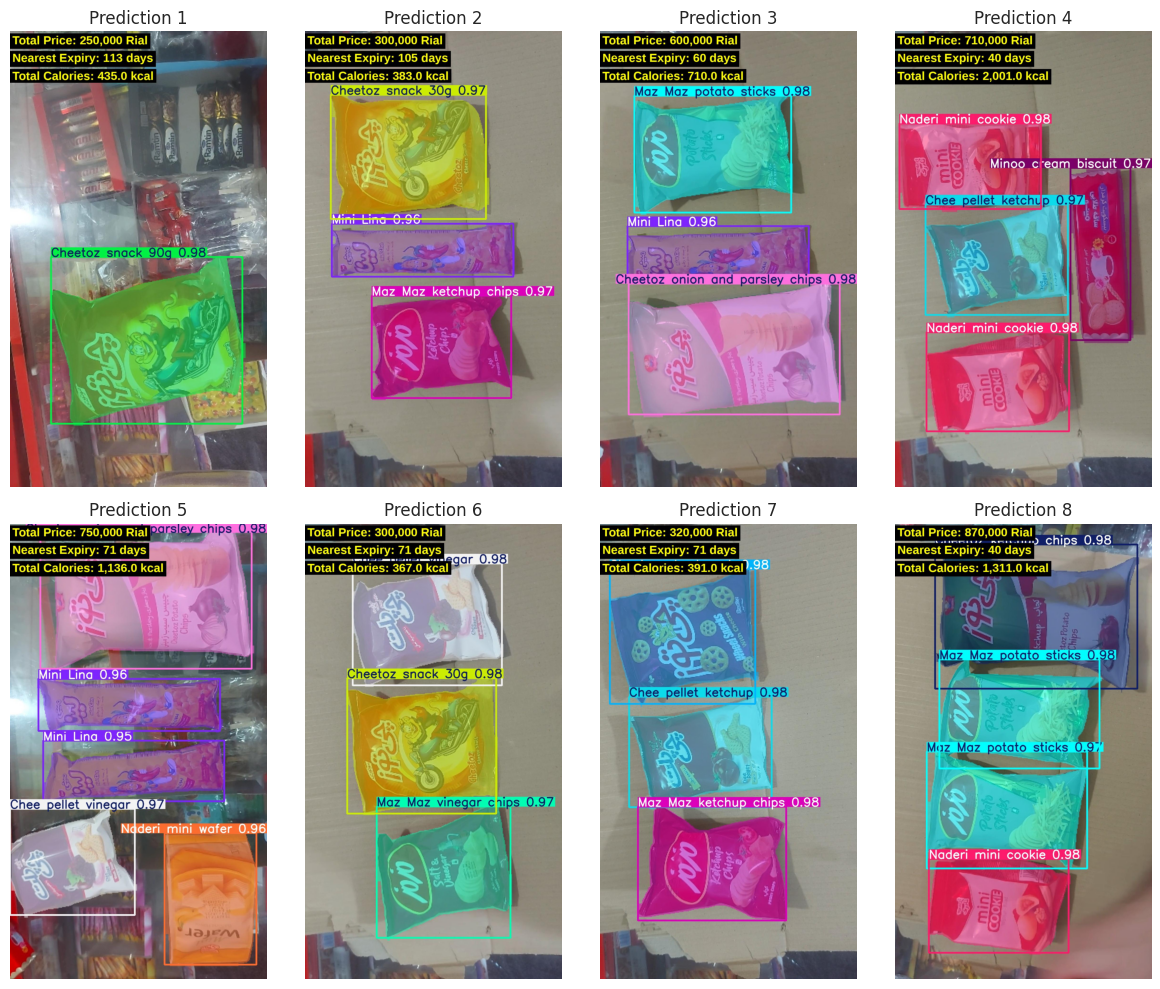

In [25]:
# Directory with predicted images
result_dir = 'runs/segment/annotated_with_price'
image_files = [os.path.join(result_dir, f) for f in os.listdir(result_dir) if f.endswith('.jpg')]

# Limit to 4 images for a 2x2 grid
image_files = image_files[:8]

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(12, 10))
axs = axs.flatten()

# Plot each image
for i, img_path in enumerate(image_files):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].set_title(f'Prediction {i+1}')
    axs[i].axis('off')

# Hide any unused subplots
for j in range(len(image_files), 8):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        After running the updated visualization code on the annotated images, we confirmed that the visual overlays are successfully applied. Each image now clearly displays the three key parameters:<br><br>
        - ✅ <strong>Total Price</strong> of the detected products<br>
        - ⏳ <strong>Nearest Expiry</strong> in days<br>
        - 🔥 <strong>Total Calories</strong> of all items combined<br><br>
        This enhancement provides users with immediate and practical insights about the contents of each scene, combining visual detection with product-level metadata in a meaningful way.
    </p>
</div>


<a id="pred_video"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">7 - Predictions on Video 🎥</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        To perform predictions on a video, we use the <b>predict</b> function on the sample video file <b>sample_video_20250506_213503.mp4</b>. By setting <b>save=True</b>, the YOLO model saves the output video with detected segmentations, while <b>save_txt=True</b> stores the detected class labels and coordinates frame-by-frame in text format. The <b>conf=0.8</b> threshold ensures only high-confidence detections are included. This allows us to extend our model’s functionality beyond static images and analyze product detections in real-time retail or surveillance video footage.
    </p>
</div>


In [ ]:
results = trained_model.predict('../data/sample_video_20250506_213503.mp4',
                                save=True, save_txt=True, conf=0.8)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1689) /kaggle/input/iranian-snack-and-chips-detection-yolo-format/sample_video_20250506_213503.mp4: 384x640 1 Chee pellet vinegar, 1 Maz Maz potato sticks, 1 Mini Lina, 51.2ms
video 1/1 (frame 2/1689) /kaggle/input/iranian-snack-and-chips-detection-yolo-format/sample_video_20250506_213503.mp4: 384x640 1 Chee pellet vinegar, 1 Maz Maz potato sticks, 1 Mini Lina, 17.0ms
video 1/1 (frame 3/1689) /kaggle/input/iranian-snack-and-chips-det

In [27]:
# Define paths
label_dir = 'runs/segment/predict/labels'
image_dir = 'runs/segment/predict'
output_dir = 'runs/segment/annotated_with_price'
os.makedirs(output_dir, exist_ok=True)

class_names = [
    'ashi mashi snacks', 'chee pellet ketchup', 'chee pellet vinegar',
    'cheetoz chili chips', 'cheetoz ketchup chips', 'cheetoz onion and parsley chips',
    'cheetoz salty chips', 'cheetoz snack 30g', 'cheetoz snack 90g',
    'cheetoz vinegar chips', 'cheetoz wheelsnack', 'maz maz ketchup chips',
    'maz maz potato sticks', 'maz maz salty chips', 'maz maz vinegar chips',
    'mini lina', 'minoo cream biscuit', 'naderi mini cookie', 'naderi mini wafer'
]

# Load the video
video_path = os.path.join(image_dir, 'sample_video_20250506_213503.avi')
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(os.path.join(output_dir, 'annotated_video.mp4'), fourcc, fps, (width, height))

frame_index = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    label_file = f"sample_video_20250506_213503_{frame_index + 1}.txt"
    label_path = os.path.join(label_dir, label_file)

    total_price = 0
    total_calories = 0
    expiry_dates = []

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            class_index = int(line.split()[0])
            class_name = class_names[class_index].lower()

            try:
                row = df_info.loc[class_name]
                total_price += row['Price(Rial)']
                total_calories += row['Calories_in_one_pack']
                expiry_dates.append(row['Days_to_Expiry'])
            except IndexError:
                print(f"Class '{class_name}' not found in DataFrame.")

    nearest_exp_date = min(expiry_dates) if expiry_dates else "Unknown"
    total_calories = int(np.ceil(total_calories))

    pil_img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_img)

    try:
        font_path = "/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf"
        font = ImageFont.truetype(font_path, size=50)
    except:
        font = ImageFont.load_default()

    text_lines = [
        f"Total Price: {total_price:,} Rial",
        f"Nearest Expiry: {nearest_exp_date} days",
        f"Total Calories: {total_calories:,} kcal"
    ]

    x, y = 10, 10
    padding = 10
    spacing = 10

    for line in text_lines:
        bbox = draw.textbbox((x, y), line, font=font)
        draw.rectangle(
            [bbox[0] - padding, bbox[1] - padding, bbox[2] + padding, bbox[3] + padding],
            fill="black"
        )
        draw.text((x, y), line, fill="yellow", font=font)
        y += (bbox[3] - bbox[1]) + 2 * padding + spacing

    frame_annotated = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
    out.write(frame_annotated)
    frame_index += 1

cap.release()
out.release()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        After predicting on the video, we annotated each frame by extracting class labels from the YOLO prediction outputs and matching them with product metadata. For every frame, we calculated and overlaid three important parameters:<br><br>
        - 💰 <strong>Total Price</strong> of detected products<br>
        - ⏳ <strong>Nearest Expiry</strong> (in days)<br>
        - 🔥 <strong>Total Calories</strong> in the current frame<br><br>
        These values are rendered directly on each frame using the Pillow library and saved into a new annotated video file. The final output provides an informative, real-time visual summary of detected items, combining object detection with valuable commercial and nutritional insights.
    </p>
</div>


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        To prepare the annotated video for display within the notebook, we first convert the original <b>.avi</b> output to <b>.mp4</b> format using FFmpeg for broader compatibility. We then compress the video using the H.264 codec with a <b>CRF</b> value of 28 and the <b>slow</b> preset to reduce file size while maintaining visual quality. Finally, we embedded and displayed the processed video inline using the <b>Video()</b> function. This makes it easy to review the final annotated output directly within the notebook environment.
    </p>
</div>

In [ ]:
# Convert the .avi video generated by the YOLO prediction to .mp4 format for compatibility with notebook display
!ffmpeg -y -loglevel panic -i runs/segment/annotated_with_price/annotated_video.mp4 ../outputs/processed_sample_video.mp4

!ffmpeg -i ../outputs/processed_sample_video.mp4 -vcodec libx264 -crf 28 -preset slow ../outputs/iranian_snack_detection_annotated_video.mp4

# Embed and display the processed sample video within the notebook
#Video("../outputs/iranian_snack_detection_compressed_video.mp4", embed=True, width=960)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

<a id="summary"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">8 - Final Thoughts & Takeaways 📝</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        This project demonstrates a practical application of computer vision in retail environments. By combining object detection and instance segmentation with product metadata, we can build a smart assistant system for supermarkets and stores. It can:<br><br>
        - ⏳ Warn store staff about products nearing their expiration dates<br>
        - 💰 Assist cashiers by automatically calculating the total price of items<br>
        - 🔥 Inform customers about calorie intake per purchase<br><br>
        The system can be further expanded to include features like inventory management, real-time stock alerts, dynamic pricing suggestions, and integration with point-of-sale systems. This lays a solid foundation for intelligent, data-driven retail automation.
    </p>
</div>


<font style="font-family:'Times New Roman', serif; font-size:200%;font-weight:bold;color:magenta;"> Best Regards!</font><br>